# Metro Boston Housing Analysis: 2013-2020 

In [303]:
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt

from pandas.plotting import scatter_matrix, radviz
from housinganalysis import pulldata 


## Get data from web

Source: Boston Magazine. Annual single family home prices. 

In [304]:
#Note each source contains data for the year prior, in some instances, multiple years prior. 
urls = {
    "2014": "https://www.bostonmagazine.com/best-places-to-live-2014-single-family-homes/",
    "2015": "https://www.bostonmagazine.com/best-places-to-live-2015-single-family-homes/",
    "2016": "https://www.bostonmagazine.com/best-places-to-live-2016-single-family-homes/",
    "2017": "https://www.bostonmagazine.com/best-places-to-live-2017-single-family-homes/",
    "2018": "https://www.bostonmagazine.com/property/top-places-to-live-2018-single-family-homes/",
    "2019": "https://www.bostonmagazine.com/property/top-places-to-live-2019-single-family-homes/",
    "2020": "https://www.bostonmagazine.com/property/single-family-home-prices/",
    "2021": "https://www.bostonmagazine.com/property/single-family-home-price-chart-2020/"
    }
#Example url
urls['2014']

'https://www.bostonmagazine.com/best-places-to-live-2014-single-family-homes/'

In [305]:
tf_acquire = False #Acquire data from url [true], or use archived csv

if tf_acquire:

    #get data for a single year
    thisyear = "2014"
    status = pulldata(thisyear, urls[thisyear])

    # get data for all years 
    for year, url in urls.items():
        pulldata( year, url )

# List data files 
pattern = "*.csv"
glob.glob(pattern)

['housingData2020.csv',
 'housingData2021.csv',
 'housingData2019.csv',
 'housingData2018.csv',
 'housingData2015.csv',
 'housingData2014.csv',
 'housingData2016.csv',
 'housingData2017.csv']

## Prepare data 

In [306]:
df = pd.read_csv( "housingData2014.csv" )
df.head()

#Drop the first column, names are messy so we'll use iloc
df = df.iloc[:, 1:] 
df.head()

#Rename the first column 
df = df.rename(columns={df.columns[0]: "Town" })

#Shorthand names 
df = df.rename(columns={
    "2013 Median Price":    "pr2013", 
    "2012 Median Price":    "pr2012",
    "2008 Median Price":    "pr2008",
    "2003 Median Price":    "pr2003",
    "One-Year Change":      "pc1y", 
    "Five-Year Change":     "pc5y",
    "10-Year Change":       "pc10y",
    "2013 Days on Market":  "dm2013", 
    "2012 Days on Market":  "dm2012",
    "One-Year Change.1":    "dc1y" 
})

#Preview 
df.head()

,Town,pr2013,pr2012,pc1y,pr2008,pc5y,pr2003,pc10y,dm2013,dm2012,dc1y
0,Abington,"$285,000","$267,000",7%,"$290,000",-2%,"$281,250",1%,89,124,28%
1,Acton,"$481,500","$480,000",0%,"$503,600",-4%,"$474,500",1%,73,121,-40%
2,Amesbury,"$302,500","$251,600",20%,"$265,250",14%,"$315,850",-4%,112,154,-27%
3,Andover,"$545,000","$505,000",8%,"$525,000",4%,"$490,000",11%,71,95,-25%
4,Arlington,"$550,000","$515,000",7%,"$475,242",16%,"$430,000",28%,27,41,-34%


In [307]:
#Identify cols with formmated numeric data as strings, and convert to int
to_convert = []
for item in df.columns[1:]:
   if df[item].dtype == "object":
        to_convert.append(item)

# Convert formatted strings to numerics
for item in to_convert:
    df[item] = df[item].str.replace(r'\D', '').astype(int)

df.head()

/Users/nick/miniconda3/envs/scistack/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  if __name__ == '__main__':


,Town,pr2013,pr2012,pc1y,pr2008,pc5y,pr2003,pc10y,dm2013,dm2012,dc1y
0,Abington,285000,267000,7,290000,2,281250,1,89,124,28
1,Acton,481500,480000,0,503600,4,474500,1,73,121,40
2,Amesbury,302500,251600,20,265250,14,315850,4,112,154,27
3,Andover,545000,505000,8,525000,4,490000,11,71,95,25
4,Arlington,550000,515000,7,475242,16,430000,28,27,41,34


## Visualize data

<AxesSubplot:xlabel='Town'>

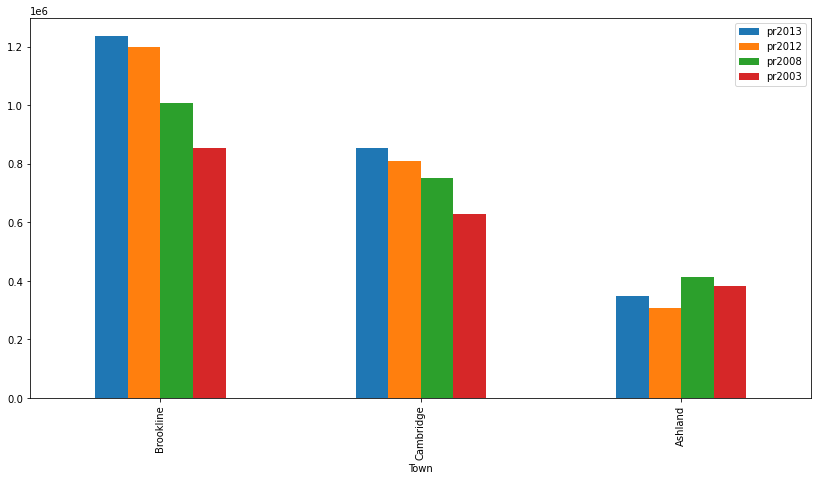

In [308]:

df2 = df.set_index("Town", inplace = False)
df2.loc[['Brookline', 'Cambridge', 'Ashland'],['pr2013', 'pr2012', 'pr2008', 'pr2003']].plot.bar(figsize=(14,7))

<AxesSubplot:xlabel='pr2003', ylabel='pr2013'>

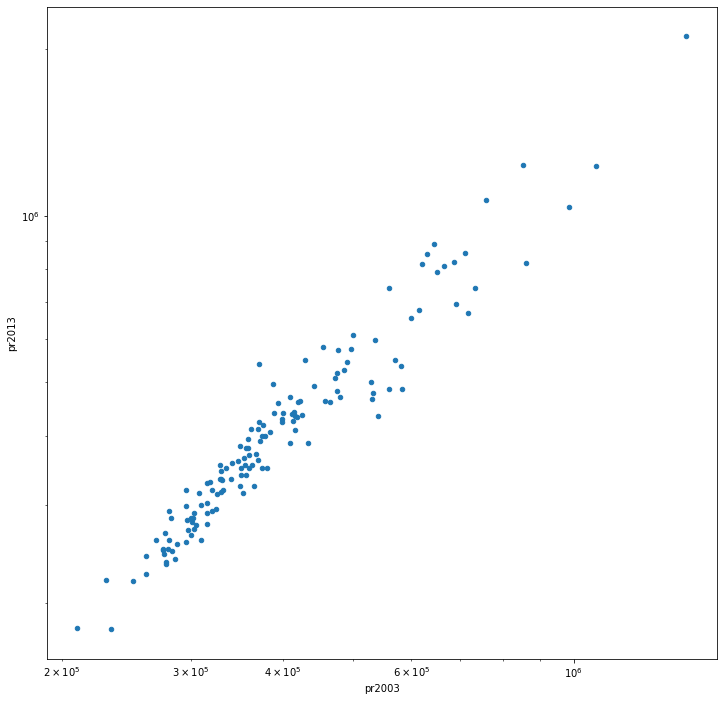

In [309]:
df.plot.scatter(x="pr2003", y="pr2013", figsize=(12,12), loglog=True)

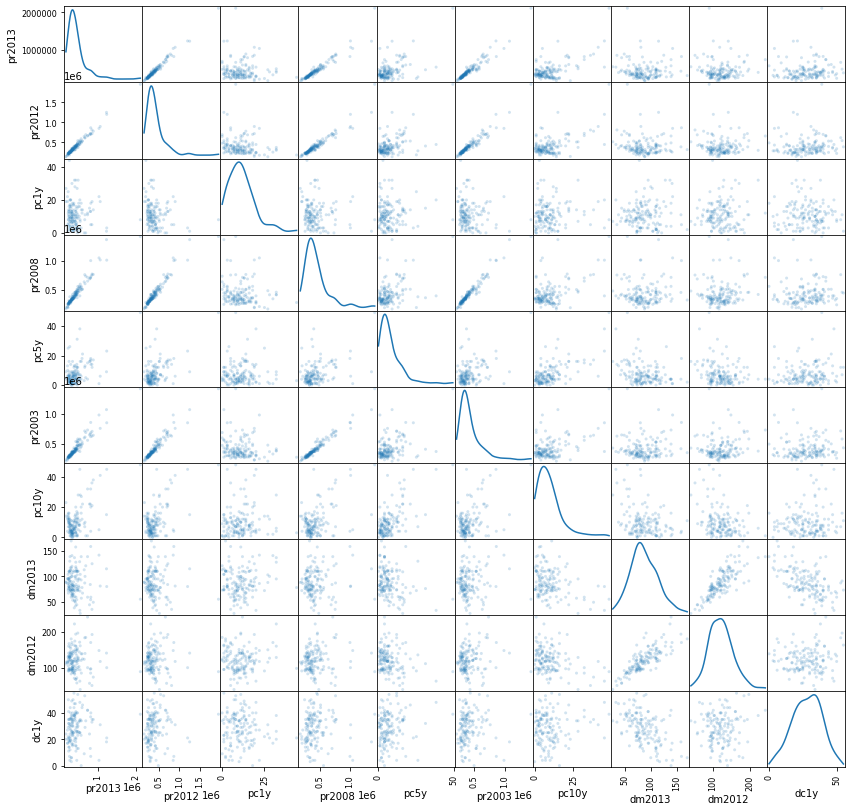

In [310]:

smo = scatter_matrix(df, alpha=0.2, figsize=(14, 14), diagonal="kde")